# Problem statement

The datasets contains Customer Transaction and Demographic related data. They hold Risky and Not Risky customers for
specific banking products. Classify customers with high and low risk.

# Objective

1. Draw insights from data by doing exploratory data analysis
2. Build classification model to classify credit risk.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as msno

In [2]:
#Reading datasets
df_payment=pd.read_csv('payment_data.csv')
df_customer=pd.read_csv('customer_data.csv')

In [3]:
df_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               8250 non-null   int64  
 1   OVD_t1           8250 non-null   int64  
 2   OVD_t2           8250 non-null   int64  
 3   OVD_t3           8250 non-null   int64  
 4   OVD_sum          8250 non-null   int64  
 5   pay_normal       8250 non-null   int64  
 6   prod_code        8250 non-null   int64  
 7   prod_limit       2132 non-null   float64
 8   update_date      8224 non-null   object 
 9   new_balance      8250 non-null   float64
 10  highest_balance  7841 non-null   float64
 11  report_date      7136 non-null   object 
dtypes: float64(3), int64(7), object(2)
memory usage: 773.6+ KB


In [4]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB


# Data preprocessing

##### Missing values

In [5]:
df_customer.isna().sum()

label       0
id          0
fea_1       0
fea_2     149
fea_3       0
fea_4       0
fea_5       0
fea_6       0
fea_7       0
fea_8       0
fea_9       0
fea_10      0
fea_11      0
dtype: int64

In [6]:
df_payment.isna().sum()

id                    0
OVD_t1                0
OVD_t2                0
OVD_t3                0
OVD_sum               0
pay_normal            0
prod_code             0
prod_limit         6118
update_date          26
new_balance           0
highest_balance     409
report_date        1114
dtype: int64

In [7]:
#Replacing missing values with mean
df_customer['fea_2']=df_customer['fea_2'].replace(np.nan,df_customer['fea_2'].mean())

In [8]:
columns=['prod_limit','highest_balance']
for col in columns:
    df_payment[col] = df_payment[col].replace(np.nan, df_payment[col].mean())

In [9]:
#Merging two dataframes using common column id
data=pd.merge(df_customer,df_payment,on='id')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8250 entries, 0 to 8249
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   label            8250 non-null   int64  
 1   id               8250 non-null   int64  
 2   fea_1            8250 non-null   int64  
 3   fea_2            8250 non-null   float64
 4   fea_3            8250 non-null   int64  
 5   fea_4            8250 non-null   float64
 6   fea_5            8250 non-null   int64  
 7   fea_6            8250 non-null   int64  
 8   fea_7            8250 non-null   int64  
 9   fea_8            8250 non-null   int64  
 10  fea_9            8250 non-null   int64  
 11  fea_10           8250 non-null   int64  
 12  fea_11           8250 non-null   float64
 13  OVD_t1           8250 non-null   int64  
 14  OVD_t2           8250 non-null   int64  
 15  OVD_t3           8250 non-null   int64  
 16  OVD_sum          8250 non-null   int64  
 17  pay_normal    

In [11]:
data.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,...,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,0,9,10,60500.000000,31/01/2015,6657.6,18934.0,19/09/2015
1,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,0,18,10,85789.702205,28/04/2009,153792.0,149387.0,10/08/2015
2,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,0,1,5,85789.702205,30/03/2009,0.0,150500.0,NaN
3,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,2,26,11906,6,10,85789.702205,17/05/2007,0.0,46371.0,12/07/2013
4,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,0,0,0,4,6,85789.702205,02/06/2016,15120.0,21500.0,19/04/2016


# EDA

<AxesSubplot:xlabel='fea_1', ylabel='Count'>

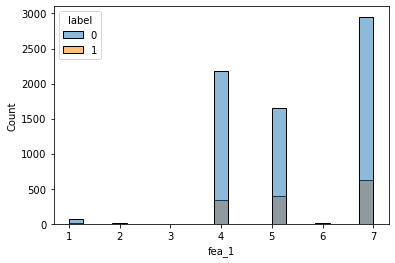

In [16]:
sb.histplot(x='fea_1',hue='label',data=data)

<AxesSubplot:xlabel='fea_2', ylabel='Count'>

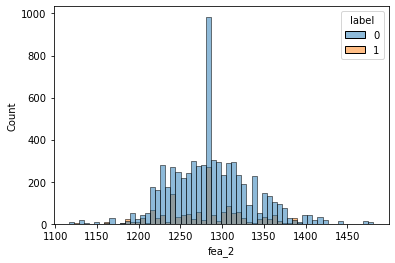

In [17]:
sb.histplot(x='fea_2',hue='label',data=data)

<AxesSubplot:xlabel='fea_3', ylabel='Count'>

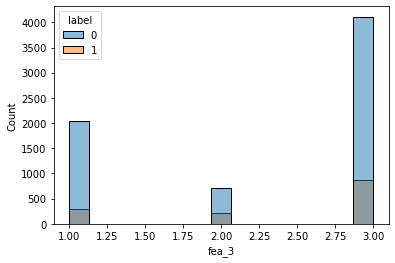

In [18]:
sb.histplot(x='fea_3',hue='label',data=data)

<AxesSubplot:xlabel='fea_4', ylabel='Count'>

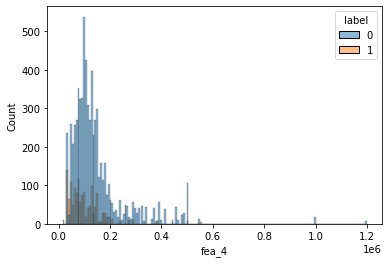

In [19]:
sb.histplot(x='fea_4',hue='label',data=data)

<AxesSubplot:xlabel='fea_5', ylabel='Count'>

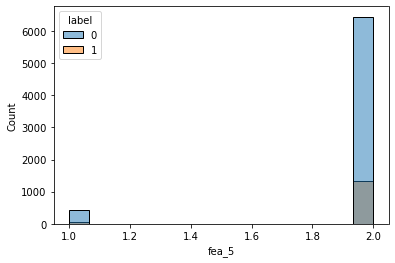

In [20]:
sb.histplot(x='fea_5',hue='label',data=data)

<AxesSubplot:xlabel='fea_6', ylabel='Count'>

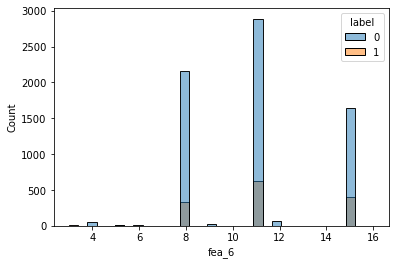

In [21]:
sb.histplot(x='fea_6',hue='label',data=data)

<AxesSubplot:xlabel='fea_7', ylabel='Count'>

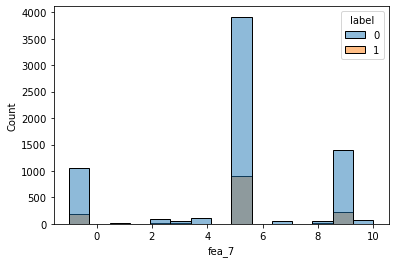

In [22]:
sb.histplot(x='fea_7',hue='label',data=data)

<AxesSubplot:xlabel='fea_8', ylabel='Count'>

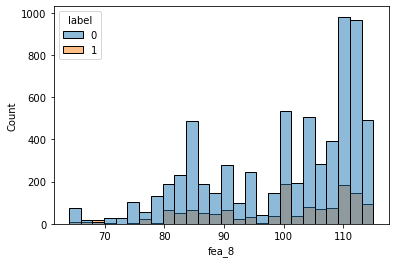

In [24]:
sb.histplot(x='fea_8',hue='label',data=data)

<AxesSubplot:xlabel='fea_9', ylabel='Count'>

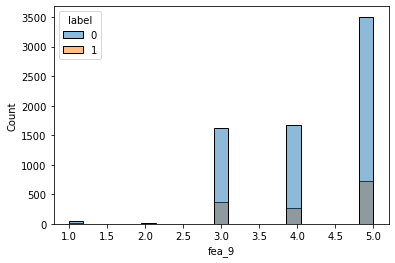

In [25]:
sb.histplot(x='fea_9',hue='label',data=data)

In [11]:
data['label'].value_counts()

0    6863
1    1387
Name: label, dtype: int64

In [12]:
x=data.drop(columns=['label','update_date','report_date'])
y=data['label']

In [88]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

0    6863
1    6863
Name: label, dtype: int64

In [89]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.2)

# Model building

##### Logistic regression

In [90]:
from sklearn.linear_model import LogisticRegression as LogReg
logreg=LogReg()

logreg.fit(x_train,y_train)

LogisticRegression()

In [91]:
test_predict = logreg.predict(x_test)

In [92]:
from sklearn.metrics import f1_score
k = f1_score(test_predict, y_test)
print('Training f1_score', k )

Training f1_score 0.6289180990899899


##### XGB

In [93]:
import xgboost as xgb

In [94]:
model=xgb.XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=6,estimators=500)

In [95]:
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:22:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:22:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              estimators=500, gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [96]:
y_pred=model.predict(x_test)

In [97]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9737800436999272


# Insights

1. As fea_1 increases credit risk increases.
2. For fea_2 between 1250 to 1350 credit risk is high.
3. For fea_3 equal to 3 credit risk is high.
4. For fea_4 between 0 to 0.2 credit risk is high.
5. For fea_5 equal to 2 risk is high.
6. For fea_8 increases risk also increases.
7. For fea_9 equal to 5 risk is high.

1. Logistic regression: Model is classifying credit risk with 62% accuracy.
2. XG boost: Model is classifying credit risk with 97% accuracy.